In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
dev = qml.device('lightning.qubit',wires=1)

@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=0)
    qml.RY(theta,wires=0)
    return qml.expval(qml.PauliZ(0))

circuit(0.1)

C:\Users\stephen\anaconda3\lib\site-packages\pennylane_lightning\lightning_qubit.py:893: UserWarning: Pre-compiled binaries for lightning.qubit are not available. Falling back to using the Python-based default.qubit implementation. To manually compile from source, follow the instructions at https://pennylane-lightning.readthedocs.io/en/latest/installation.html.
  warn(


tensor(-0.99500417, requires_grad=True)

In [4]:
thetas = np.linspace(-np.pi,np.pi,50)
measurements = []
for theta in thetas:
    measurements.append(circuit(theta))

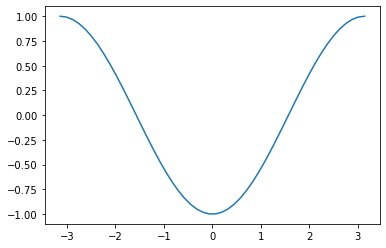

In [7]:
fix,ax = plt.subplots()
ax.plot(thetas,measurements)
plt.show()

In [8]:
theta = np.array([-2],requires_grad=True)

In [11]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [12]:
n_it = 100
for it in range(n_it):
    theta,prev_cost = opt.step_and_cost(circuit,theta)
    if it%10==0:
        print('Theta: ',theta,'Cost: ',circuit(theta))

Theta:  [-1.90907026] Cost:  0.33185933611436363
Theta:  [-0.95268251] Cost:  -0.5794990037893342
Theta:  [-0.35999832] Cost:  -0.9358974149503752
Theta:  [-0.12693105] Cost:  -0.9919550642770163
Theta:  [-0.04431925] Cost:  -0.9990180628025327
Theta:  [-0.01545577] Cost:  -0.9998805620275653
Theta:  [-0.0053892] Cost:  -0.9999854782829674
Theta:  [-0.0018791] Cost:  -0.9999982344856905
Theta:  [-0.0006552] Cost:  -0.9999997853544914
Theta:  [-0.00022846] Cost:  -0.9999999739041142
